In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
data=pd.read_csv("~/Desktop/Fish.csv") 
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [8]:
data.rename(columns= {'Length1':'VerticalLength', 'Length2':'DiameterLength', 'Length3':'CrossLength'}, inplace=True)
data

,Species,Weight,VerticalLength,DiameterLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [9]:
data.shape

(159, 7)

In [10]:
data.describe()

,Weight,VerticalLength,DiameterLength,CrossLength,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [11]:
data.isnull().sum()

Species           0
Weight            0
VerticalLength    0
DiameterLength    0
CrossLength       0
Height            0
Width             0
dtype: int64

In [12]:
corelation = data.corr()

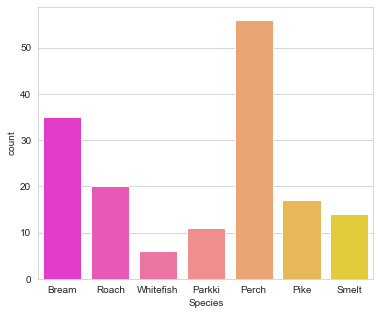

In [13]:
plt.figure(figsize=(6,5))
sns.set_style('whitegrid')
sns.countplot(x='Species',data=data,palette="spring")

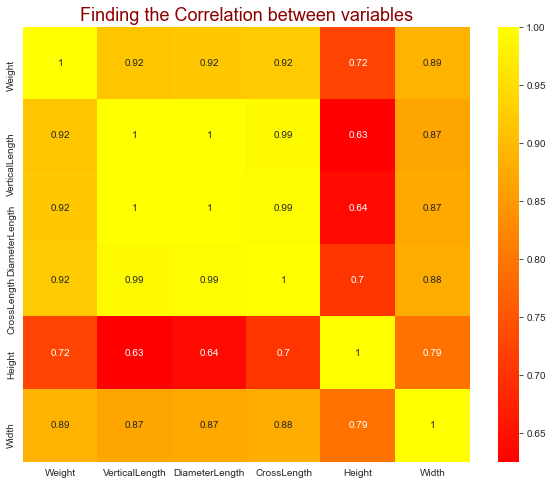

In [14]:
plt.figure(figsize=(10,8))
plt.title("Finding the Correlation between variables", fontsize = 18, color = 'darkred')
sns.heatmap(corelation,xticklabels= corelation.columns, yticklabels=corelation.columns,annot = True, cmap='autumn')

<Figure size 720x576 with 0 Axes>

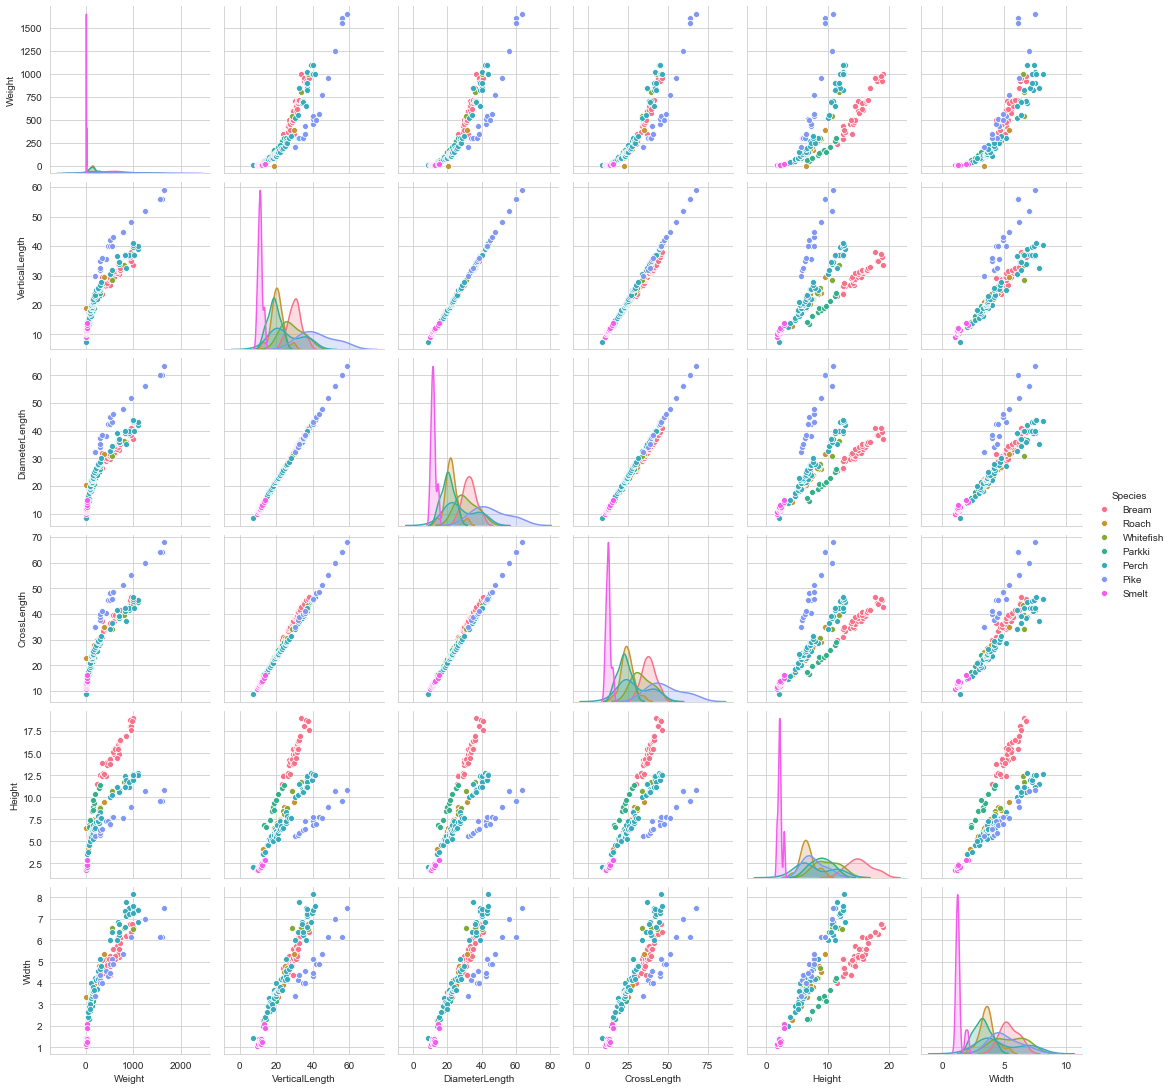

In [15]:
plt.figure(figsize=(10,8))
sns.pairplot(data, kind='scatter', hue='Species', palette="husl");

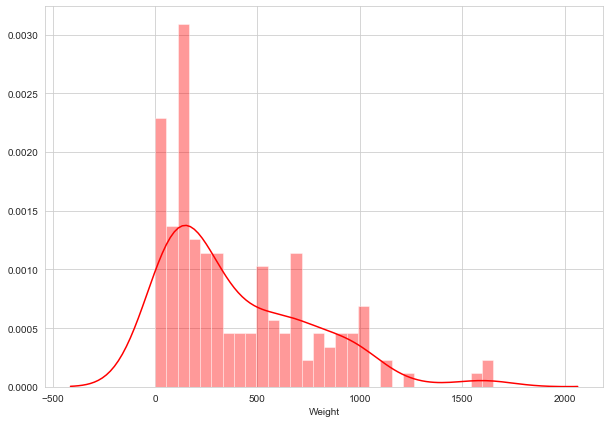

In [16]:
plt.figure(figsize=(10,7))
sns.distplot(data['Weight'], bins = 30,  color = 'red')

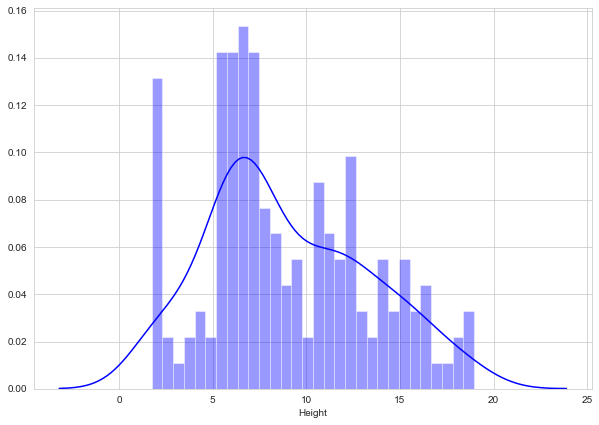

In [17]:
plt.figure(figsize=(10,7))
sns.distplot(data['Height'], bins = 30,  color = 'blue')

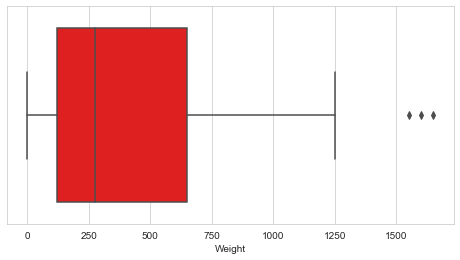

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['Weight'],color= 'red')

In [19]:
dw = data['Weight']
Q1 = dw.quantile(0.25)
Q3 = dw.quantile(0.75)
IQR = Q3 - Q1
data_lowerend = Q1 - (1.5 * IQR)
data_upperend = Q3 + (1.5 * IQR)

weight_outliers = dw[(dw < data_lowerend) | (dw > data_upperend)]
weight_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

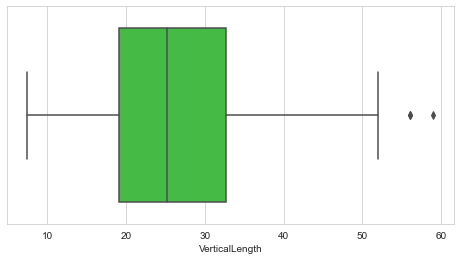

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['VerticalLength'],color= 'limegreen')

In [21]:
dv = data['VerticalLength']
Q1 = dv.quantile(0.25)
Q3 = dv.quantile(0.75)
IQR = Q3 - Q1
data_lowerend = Q1 - (1.5 * IQR)
data_upperend = Q3 + (1.5 * IQR)

vertical_outliers = dv[(dv < data_lowerend) | (dv > data_upperend)]
vertical_outliers

142    56.0
143    56.0
144    59.0
Name: VerticalLength, dtype: float64

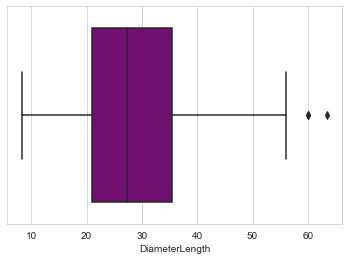

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['DiameterLength'],color= 'purple')

In [23]:
dd = data['DiameterLength']
Q1 = dd.quantile(0.25)
Q3 = dd.quantile(0.75)
IQR = Q3 - Q1
data_lowerend = Q1 - (1.5 * IQR)
data_upperend = Q3 + (1.5 * IQR)

diameter_outliers = dd[(dd < data_lowerend) | (dd > data_upperend)]
diameter_outliers

142    60.0
143    60.0
144    63.4
Name: DiameterLength, dtype: float64

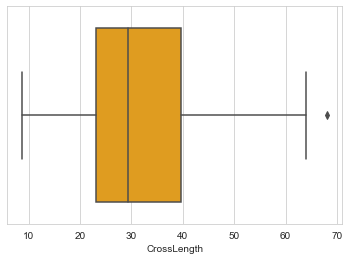

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['CrossLength'],color= 'orange')

In [25]:
dc = data['CrossLength']
Q1 = dc.quantile(0.25)
Q3 = dc.quantile(0.75)
IQR = Q3 - Q1
data_lowerend = Q1 - (1.5 * IQR)
data_upperend = Q3 + (1.5 * IQR)

cross_outliers = dc[(dc < data_lowerend) | (dc > data_upperend)]
cross_outliers

144    68.0
Name: CrossLength, dtype: float64

In [26]:
data[142:145]

,Species,Weight,VerticalLength,DiameterLength,CrossLength,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [27]:
datanew=data.drop([142, 143, 144])
datanew

,Species,Weight,VerticalLength,DiameterLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [28]:
datanew.describe()

,Weight,VerticalLength,DiameterLength,CrossLength,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


In [29]:
X = datanew[['VerticalLength', 'DiameterLength', 'CrossLength', 'Weight', 'Width']].values
y = datanew['Height'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
X_train.shape, y_train.shape 

((124, 5), (124,))

In [32]:
y_test.shape, y_test.shape 

((32,), (32,))

In [33]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,16.3618,16.563406
1,9.4850,10.268943
2,5.5756,6.257472
3,10.8810,11.332284
4,16.2405,15.854161
5,12.6700,12.854124
6,7.0334,8.592057
7,7.5852,6.093151
8,6.9600,7.661463
9,6.4752,6.287799


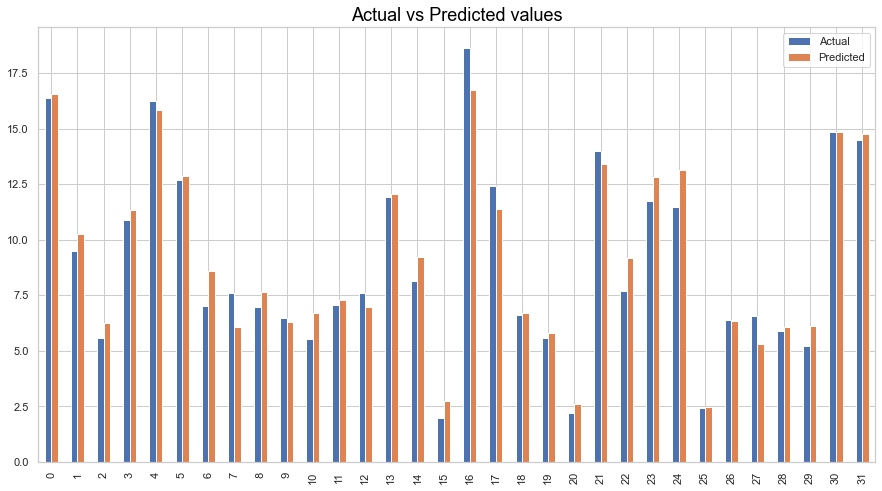

In [134]:
df.plot(kind='bar',figsize=(15,8))
plt.title('Actual vs Predicted values',  color = 'black', fontsize = '18' )
plt.show()

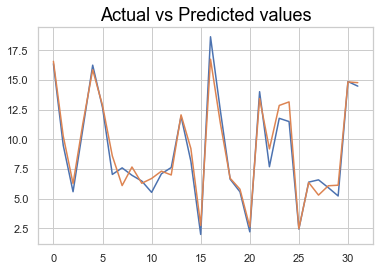

In [135]:
fig, ax = plt.subplots()
ax.set_title('Actual vs Predicted values',  color = 'black', fontsize = '18' )
ax.plot(y_test)
ax.plot(y_pred)

In [37]:
coeff_df = pd.DataFrame(regressor.coef_, ['VerticalLength', 'CrossLength', 'DiameterLength', 'Weight', 'Width'], columns=['Coefficient'])  
coeff_df

,Coefficient
VerticalLength,-1.619453
CrossLength,-0.209270
DiameterLength,1.584280
Weight,0.003712
Width,1.274494


In [51]:
print('Y-Intercept(c):', regressor.intercept_)

print('slope of line(m)',regressor.coef_)

# The closer towards 1, the better the fit
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))


Y-Intercept(c): 0.9542568832749634
slope of line(m) [-1.61945303 -0.20926978  1.58428012  0.00371201  1.27449366]
Coefficient of determination (R^2): 0.96
